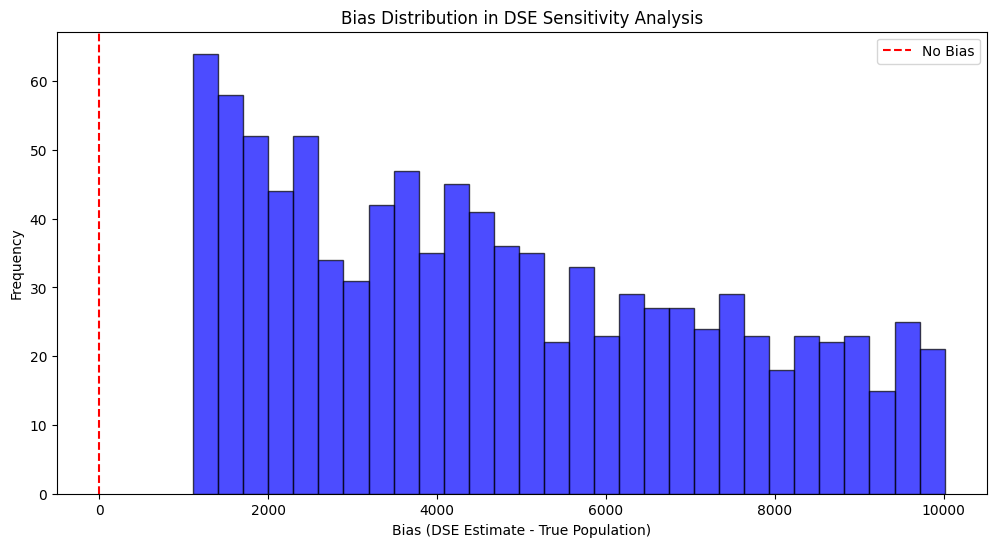

Mean Bias: 4733.41
Median Bias: 4342.83
Standard Deviation of Bias: 2537.70


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function for the Dual System Estimate (DSE)
def dse(capture_count, recapture_count, matched_count):
    """
    Dual System Estimate formula: (N1 * N2) / M
    where:
    - N1 = capture count (e.g., census count)
    - N2 = recapture count (e.g., survey count)
    - M = matched count (intersection of the two)
    """
    if matched_count == 0:
        return np.nan  # Avoid division by zero
    return (capture_count * recapture_count) / matched_count

# Simulate sensitivity analysis
def simulate_dse_sensitivity(num_simulations=1000, population=10000):
    """
    Perform sensitivity analysis by simulating variations in the capture and matching process.
    
    Parameters:
    - num_simulations: Number of simulations to perform
    - population: True population size
    
    Returns:
    - results: Dictionary of sensitivity results
    """
    results = []
    
    for _ in range(num_simulations):
        # Randomly vary capture rates, recapture rates, and matching probabilities
        capture_rate = np.random.uniform(0.4, 0.8)  # Simulate census undercount
        recapture_rate = np.random.uniform(0.3, 0.7)  # Simulate survey undercount
        matching_rate = np.random.uniform(0.5, 0.9)  # Simulate matching success
        
        # Calculate counts
        capture_count = int(population * capture_rate)
        recapture_count = int(population * recapture_rate)
        matched_count = int(capture_count * recapture_rate * matching_rate)
        
        # Compute the DSE
        estimate = dse(capture_count, recapture_count, matched_count)
        results.append({
            'capture_rate': capture_rate,
            'recapture_rate': recapture_rate,
            'matching_rate': matching_rate,
            'dse_estimate': estimate,
            'bias': estimate - population
        })
    
    return results

# Run simulation
population_size = 10000  # True population
simulation_results = simulate_dse_sensitivity(num_simulations=1000, population=population_size)

# Analyze results
estimates = [result['dse_estimate'] for result in simulation_results if not np.isnan(result['dse_estimate'])]
biases = [result['bias'] for result in simulation_results if not np.isnan(result['dse_estimate'])]

# Plot sensitivity analysis results
plt.figure(figsize=(12, 6))
plt.hist(biases, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='No Bias')
plt.title('Bias Distribution in DSE Sensitivity Analysis')
plt.xlabel('Bias (DSE Estimate - True Population)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary statistics
print(f"Mean Bias: {np.mean(biases):.2f}")
print(f"Median Bias: {np.median(biases):.2f}")
print(f"Standard Deviation of Bias: {np.std(biases):.2f}")
